In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('C:/Users/1/Data/gbm-data.csv')

In [3]:
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.shape

(3751, 1777)

In [5]:
X = data.iloc[:, 1:].values
Y = data['Activity'].values

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size = 0.8, 
                                                    random_state = 241)

In [7]:
def sigmoid(pred):
    return 1 / (1 + np.exp(-pred))

In [8]:
# рассчитываем ошибку между истинными ответами и предсказаниями, полученными из метода staged_decision_function
def calculate_loss(Y, pred):
    list_of_loss = []
    for row in pred:
        loss = log_loss(Y, row)
        list_of_loss.append(loss)
    return list_of_loss

In [9]:
def GBS_search(X_train, X_test, Y_train, Y_test, learning_rate = 0.1):
    GBC = GradientBoostingClassifier(n_estimators = 250, 
                                     verbose = True, 
                                     random_state = 241, 
                                     learning_rate = learning_rate)
    GBC.fit(X_train, Y_train)
    
    # метод staged_decision_function позволяет получить предсказания на обучающей и тестовой выборке на каждой итерации
    # возвращает генератор, поэтому превращаем список, далее в массив numpy (строки - итерации, столбцы - объекты выборки)
    # reshape - чтобы убрать лишнюю ось
    pred_train = np.array([x for x in GBC.staged_decision_function(X_train)]).reshape(250, 750)
    pred_test = np.array([x for x in GBC.staged_decision_function(X_test)]).reshape(250, 3001)
    # вместо этого можно использовать метод staged_predict_proba
    
    # преобразование предсказания с помощью сигмоидной функции
    pred_train = sigmoid(pred_train)
    pred_test = sigmoid(pred_test)
    
    train_loss = calculate_loss(Y_train, pred_train)
    test_loss = calculate_loss(Y_test, pred_test)
    
    plt.figure()
    plt.plot(test_loss, 'r', linewidth=2)
    plt.plot(train_loss, 'g', linewidth=2)
    plt.legend(['test', 'train'])
    
    # минимальное значение метрики и номер итерации, на которой оно достигается
    min_loss_train = min(train_loss)
    iter_train = train_loss.index(min_loss_train) + 1
    
    min_loss_test = min(test_loss)
    iter_test = test_loss.index(min_loss_test) + 1
    
    print('min_loss_train: ', round(min_loss_train, 2), 'iter: ', iter_train)
    print('min_loss_test: ', round(min_loss_test, 2), 'iter: ', iter_test)

      Iter       Train Loss   Remaining Time 
         1           1.0190           25.40s
         2           0.9192           24.06s
         3           0.8272           25.11s
         4           0.7834           25.22s
         5           0.7109           25.09s
         6           0.6368           24.24s
         7           0.5797           25.17s
         8           0.5610           26.23s
         9           0.5185           25.82s
        10           0.4984           25.51s
        20           0.1999           23.61s
        30           0.1313           21.93s
        40           0.0790           20.87s
        50           0.0511           19.54s
        60           0.0352           18.36s
        70           0.0245           17.31s
        80           0.0162           16.41s
        90           0.0114           15.51s
       100           0.0077           14.50s
       200           0.0004            4.33s
min_loss_train:  0.0 iter:  181
min_loss_test:  0.58 i

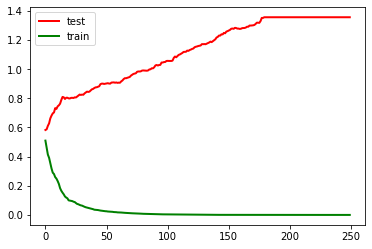

In [10]:
GBS_search(X_train, X_test, Y_train, Y_test, learning_rate = 1)

      Iter       Train Loss   Remaining Time 
         1           1.1255           23.66s
         2           1.0035           21.82s
         3           0.9386           22.81s
         4           0.8844           23.62s
         5           0.8381           23.77s
         6           0.7995           23.99s
         7           0.7559           23.81s
         8           0.7205           23.59s
         9           0.6958           23.38s
        10           0.6725           23.28s
        20           0.4672           22.14s
        30           0.3179           21.44s
        40           0.2274           20.07s
        50           0.1774           19.01s
        60           0.1394           17.94s
        70           0.1050           17.01s
        80           0.0805           15.97s
        90           0.0650           15.00s
       100           0.0511           13.99s
       200           0.0058            4.67s
min_loss_train:  0.0 iter:  250
min_loss_test:  0.56 i

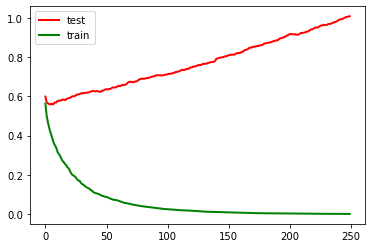

In [11]:
GBS_search(X_train, X_test, Y_train, Y_test, learning_rate = 0.5)

      Iter       Train Loss   Remaining Time 
         1           1.2095           29.14s
         2           1.1006           24.30s
         3           1.0240           24.37s
         4           0.9729           23.86s
         5           0.9387           24.16s
         6           0.8948           23.59s
         7           0.8621           23.61s
         8           0.8360           23.29s
         9           0.8171           23.27s
        10           0.7883           23.11s
        20           0.6029           22.03s
        30           0.4760           20.69s
        40           0.3879           19.60s
        50           0.3325           18.60s
        60           0.2759           18.01s
        70           0.2304           16.99s
        80           0.1969           16.01s
        90           0.1718           15.07s
       100           0.1404           14.19s
       200           0.0358            4.74s
min_loss_train:  0.01 iter:  250
min_loss_test:  0.54 

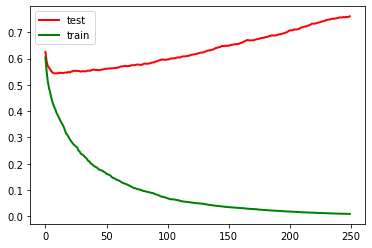

In [12]:
GBS_search(X_train, X_test, Y_train, Y_test, learning_rate = 0.3)

      Iter       Train Loss   Remaining Time 
         1           1.2613           26.90s
         2           1.1715           23.57s
         3           1.1009           23.55s
         4           1.0529           23.12s
         5           1.0130           23.13s
         6           0.9740           23.75s
         7           0.9475           23.71s
         8           0.9197           23.35s
         9           0.8979           23.03s
        10           0.8730           22.66s
        20           0.7207           21.94s
        30           0.6055           20.83s
        40           0.5244           19.75s
        50           0.4501           18.77s
        60           0.3908           18.05s
        70           0.3372           17.15s
        80           0.3009           16.10s
        90           0.2603           15.07s
       100           0.2327           14.09s
       200           0.0835            4.70s
min_loss_train:  0.02 iter:  250
min_loss_test:  0.53 

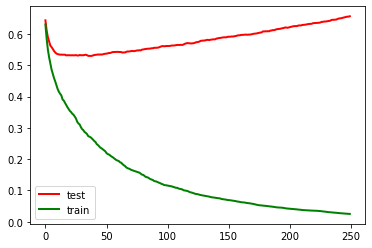

In [13]:
GBS_search(X_train, X_test, Y_train, Y_test, learning_rate = 0.2)

      Iter       Train Loss   Remaining Time 
         1           1.3199           25.91s
         2           1.2645           23.68s
         3           1.2170           24.70s
         4           1.1775           24.35s
         5           1.1404           24.35s
         6           1.1106           23.83s
         7           1.0844           23.57s
         8           1.0617           23.14s
         9           1.0411           22.79s
        10           1.0223           22.44s
        20           0.8864           21.45s
        30           0.7844           20.31s
        40           0.7176           19.44s
        50           0.6590           18.68s
        60           0.6120           17.73s
        70           0.5599           16.74s
        80           0.5242           15.80s
        90           0.4829           14.84s
       100           0.4473           13.90s
       200           0.2379            4.70s
min_loss_train:  0.09 iter:  250
min_loss_test:  0.53 

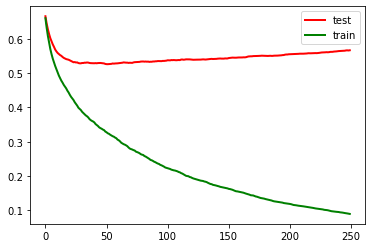

In [14]:
GBS_search(X_train, X_test, Y_train, Y_test, learning_rate = 0.1)

На этих же данных обучите RandomForestClassifier с количеством деревьев, равным количеству итераций, на котором достигается наилучшее качество у градиентного бустинга с learning_rate = 0.2

In [15]:
RFC = RandomForestClassifier(n_estimators = 37, random_state = 241)
RFC.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=37,
                       n_jobs=None, oob_score=False, random_state=241,
                       verbose=0, warm_start=False)

In [16]:
pred = RFC.predict_proba(X_test)

In [17]:
round(log_loss(Y_test, pred), 2)

0.54

Cлучайный лес может показать более высокое качество при неограниченных ресурсах — так, он выиграет у градиентного бустинга на наших данных, если увеличить число деревьев до нескольких сотен

In [18]:
RFC2 = RandomForestClassifier(n_estimators = 250, random_state = 241)
RFC2.fit(X_train, Y_train)
pred = RFC2.predict_proba(X_test)
log_loss(Y_test, pred)

0.5244605353708105